#### The main objective of this Notebook is to investigate the assumption that the way article titles are formulated highly contributes to level of user engagement 
- The given dataset contains 5000 legal article descriptions and article activities collected from Mondaq Website
- First, we focused on understanding data properties and derive insights of user engagement using exploratory data analysis
- Second we proposed an supervised three state classification which predicts the high, moderate and low level of user engagement based on article titles

### Notebook BreakDown
1. Data Description
2. Data Exploration
3. Data Preparation<br>
    3.1 Date Formatting<br>
    3.2 Target Variable <br>
4. Exploratory Data Analysis <br>
    4.1 Bivariant Analysis<br>
    4.2 Text Based Analysis<br>
    4.3 NLP based Analysis<br>
5. Data Preparation for modelling<br>
    5.1 Encoding Categorical Variables<br>
    5.2 Text Preprocessing<br>
    5.3 Text Featurization using Bag Of Words<br>
    5.4 Text Featurization using Term frequency-Inverse document frequency<br>
    5.5 Text Featurization using Word Embeddings<br>
6. Modelling<br>
    6.1 Data Normalization<br>
    6.2 Training and Test datasets<br>
    6.3 Model Training using Naive bayes<br>
    6.4 Model Training using Support Vector Machine<br>
    6.5 Model Training using Random Forest<br>
    6.6 Model Training using XGBoost<br>
    6.7 Model Training using Stacking Techniques<br>
    6.8 Model Training using Artiﬁcial Neural Networks<br>
7. Discussions<br>
8. Conclusion<br>

### 1. Data Description

In [2]:
##Importing necessary Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

import string
punctuation = string.punctuation

#import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
eng_stop = set(stopwords.words('english'))
from nltk.corpus import stopwords

#pip install textblob
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer

#pip install -U spacy
#python -m spacy download en
#pip install wordcloud

from IPython.display import Image

#Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#pip install -U gensim
from gensim.models import Word2Vec

#!pip install tensorflow==2.0.0-alpha0
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import xgboost
from mlxtend.classifier import StackingClassifier

In [2]:
#Data Loading
df_Activity=pd.read_csv("5k_article_activity.csv")
df_Description=pd.read_csv("5k_articles.csv", engine='python')

#### Article Activity

In [3]:
#Checking information about Article Activities
df_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192958 entries, 0 to 192957
Data columns (total 4 columns):
article_id               192958 non-null int64
session_tracking_id      192958 non-null int64
individual_session_id    192958 non-null int64
click_event_date         192958 non-null object
dtypes: int64(3), object(1)
memory usage: 5.9+ MB


#### Article Description

In [4]:
#Checking information about Article Descriptions
df_Description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
article_id              5000 non-null int64
article_publish_date    5000 non-null object
title                   5000 non-null object
topic_desc              5000 non-null object
country_desc            5000 non-null object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [5]:
#First three rows of Article Description
df_Description.head(3)

,article_id,article_publish_date,title,topic_desc,country_desc
0,691194,25/10/2018,Canada&#39;s Mandatory Privacy Breach Reportin...,Privacy,Canada
1,709050,20/07/2018,Medical Marijuana: If You Can't Measure Residu...,Employment and HR,Canada
2,715494,02/07/2018,Ontario Welcomes New Cabinet - Expect Quick Ac...,"Government, Public Sector",Canada


### 2. Data Exploration

In [6]:
#First three rows of Article Activities
df_Activity.head(3)

,article_id,session_tracking_id,individual_session_id,click_event_date
0,726634,747820650,704312710,11/08/2018
1,728406,749792604,706344088,16/08/2018
2,726884,748993528,705447000,14/08/2018


In [7]:
#Checking for Missing vlaues
df_Activity.isnull().sum()

article_id               0
session_tracking_id      0
individual_session_id    0
click_event_date         0
dtype: int64

In [8]:
# Data Description of Article Activities
df_Activity.describe()

,article_id,session_tracking_id,individual_session_id
count,192958.000000,1.929580e+05,1.929580e+05
mean,770560.879850,8.154972e+08,7.733511e+08
std,47499.883708,7.315155e+07,7.315304e+07
min,399550.000000,7.336968e+08,6.898407e+08
25%,737896.000000,7.647284e+08,7.229473e+08
50%,749526.000000,7.804848e+08,7.400032e+08
75%,807970.000000,8.765963e+08,8.311853e+08
max,879128.000000,9.864153e+08,9.498946e+08


In [9]:
# Data Description of Article Activities
df_Activity.describe(include='O')

,click_event_date
count,192958
unique,558
top,05/10/2018
freq,2046


In [10]:
# Data Description of Article Description
df_Description.describe()

,article_id
count,5000.000000
mean,773838.776400
std,49217.910198
min,399550.000000
25%,734801.500000
50%,754169.000000
75%,810752.500000
max,879128.000000


In [11]:
# Data Description of Article Description
df_Description.describe(include='O')

,article_publish_date,title,topic_desc,country_desc
count,5000,5000,5000,5000
unique,397,4918,10,2
top,02/07/2018,"Inside track: Local Government - In the media,...",Employment and HR,Australia
freq,57,8,1080,2962


In [12]:
#Chekcing for duplicated Values
df_Description[df_Description['article_id'].duplicated()].count()

article_id              0
article_publish_date    0
title                   0
topic_desc              0
country_desc            0
dtype: int64

In [13]:
#Chekcing for duplicated Values
df_Activity[df_Activity['session_tracking_id'].duplicated()].count()

article_id               0
session_tracking_id      0
individual_session_id    0
click_event_date         0
dtype: int64

In [14]:
#Chekcing for duplicated Values
df_Activity[df_Activity[['article_id','session_tracking_id']].duplicated()].count()

article_id               0
session_tracking_id      0
individual_session_id    0
click_event_date         0
dtype: int64

### 3. Data Preparation
- Data Merging
- Calculating Days between Article publish Date and Click Event Date
- Extrating No of clicks

In [15]:
#Data Merging 
df=pd.merge(df_Description,df_Activity,on='article_id')

In [16]:
# First 5 rows of prepared data
df.head(5)

,article_id,article_publish_date,title,topic_desc,country_desc,session_tracking_id,individual_session_id,click_event_date
0,709050,20/07/2018,Medical Marijuana: If You Can't Measure Residu...,Employment and HR,Canada,741166656,697735972,23/07/2018
1,715494,02/07/2018,Ontario Welcomes New Cabinet - Expect Quick Ac...,"Government, Public Sector",Canada,734408140,690572504,03/07/2018
2,715230,02/07/2018,Modern Slavery Act tabled in Parliament,"Government, Public Sector",Australia,733828766,689984496,02/07/2018
3,715230,02/07/2018,Modern Slavery Act tabled in Parliament,"Government, Public Sector",Australia,734392432,690560664,03/07/2018
4,715230,02/07/2018,Modern Slavery Act tabled in Parliament,"Government, Public Sector",Australia,734486714,690659944,04/07/2018


In [17]:
#Day Feature Engineering
df['A'] = pd.to_datetime(df['click_event_date']).dt.strftime("%d-%m-%Y") 
df['B'] = pd.to_datetime(df['article_publish_date']).dt.strftime("%d-%m-%Y")
df['Day'] = (pd.to_datetime(df['A']) - pd.to_datetime(df['B'])) / np.timedelta64(1, 'D')
df.drop(columns=['A','B'],inplace=True)

In [18]:
#Checking first four rows of data
df.head(4)

,article_id,article_publish_date,title,topic_desc,country_desc,session_tracking_id,individual_session_id,click_event_date,Day
0,709050,20/07/2018,Medical Marijuana: If You Can't Measure Residu...,Employment and HR,Canada,741166656,697735972,23/07/2018,3.0
1,715494,02/07/2018,Ontario Welcomes New Cabinet - Expect Quick Ac...,"Government, Public Sector",Canada,734408140,690572504,03/07/2018,1.0
2,715230,02/07/2018,Modern Slavery Act tabled in Parliament,"Government, Public Sector",Australia,733828766,689984496,02/07/2018,0.0
3,715230,02/07/2018,Modern Slavery Act tabled in Parliament,"Government, Public Sector",Australia,734392432,690560664,03/07/2018,1.0


In [19]:
#Description of new Day variable
df['Day'].describe()

count    192958.000000
mean          3.499202
std           3.705492
min           0.000000
25%           1.000000
50%           2.000000
75%           6.000000
max          14.000000
Name: Day, dtype: float64

In [20]:
#Investigating Day
df[df['article_id']==399550].head(5)

,article_id,article_publish_date,title,topic_desc,country_desc,session_tracking_id,individual_session_id,click_event_date,Day
38834,399550,30/08/2018,Circumstantial Evidence And Insider Trading,Corporate/Commercial Law,Canada,754986744,711900010,30/08/2018,0.0
38835,399550,30/08/2018,Circumstantial Evidence And Insider Trading,Corporate/Commercial Law,Canada,755069120,711983198,30/08/2018,0.0
38836,399550,30/08/2018,Circumstantial Evidence And Insider Trading,Corporate/Commercial Law,Canada,758819594,716797132,07/09/2018,8.0
38837,399550,30/08/2018,Circumstantial Evidence And Insider Trading,Corporate/Commercial Law,Canada,757754834,715822678,05/09/2018,6.0
38838,399550,30/08/2018,Circumstantial Evidence And Insider Trading,Corporate/Commercial Law,Canada,760667662,718847120,12/09/2018,13.0


In [21]:
#Number of clicks feature Engineering
data=df.groupby(['article_id','title','article_publish_date','click_event_date','topic_desc','country_desc','Day'])['click_event_date'].count().to_frame(name = 'no of clicks').reset_index()

In [22]:
#Checking first four rows of data
data.head(4)

,article_id,title,article_publish_date,click_event_date,topic_desc,country_desc,Day,no of clicks
0,399550,Circumstantial Evidence And Insider Trading,30/08/2018,05/09/2018,Corporate/Commercial Law,Canada,6.0,1
1,399550,Circumstantial Evidence And Insider Trading,30/08/2018,07/09/2018,Corporate/Commercial Law,Canada,8.0,1
2,399550,Circumstantial Evidence And Insider Trading,30/08/2018,12/09/2018,Corporate/Commercial Law,Canada,13.0,5
3,399550,Circumstantial Evidence And Insider Trading,30/08/2018,30/08/2018,Corporate/Commercial Law,Canada,0.0,2


In [23]:
#Information about data
print(data.describe())
data.info()

          article_id           Day  no of clicks
count   37442.000000  37442.000000  37442.000000
mean   774947.536082      5.337001      5.153517
std     48724.119060      4.189604     25.975063
min    399550.000000      0.000000      1.000000
25%    735910.000000      2.000000      1.000000
50%    754818.000000      5.000000      2.000000
75%    812700.000000      8.000000      4.000000
max    879128.000000     14.000000    909.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37442 entries, 0 to 37441
Data columns (total 8 columns):
article_id              37442 non-null int64
title                   37442 non-null object
article_publish_date    37442 non-null object
click_event_date        37442 non-null object
topic_desc              37442 non-null object
country_desc            37442 non-null object
Day                     37442 non-null float64
no of clicks            37442 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


### 4. Exploratory Data Analysis
- Bivarient Analysis
- Text Based Features
- NLP Based Features

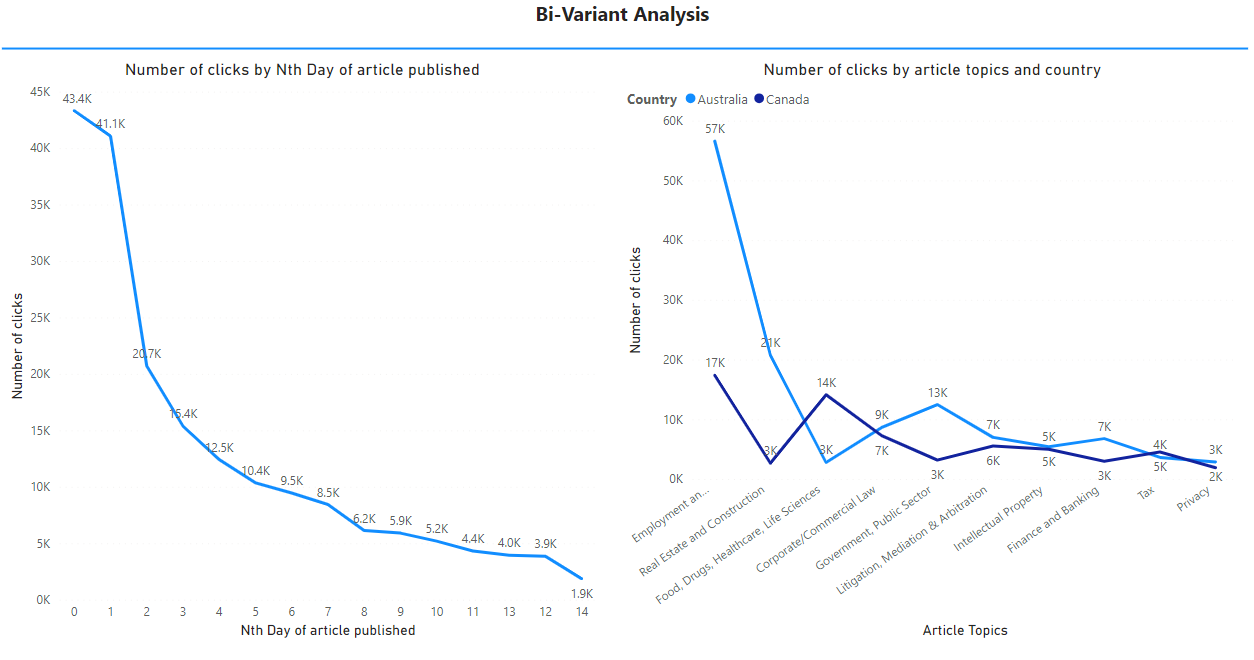

In [5]:
#Displaying Bivariant Analysis
Image(filename='../Exploratory Data Analysis/Bivariant Analysis.png')

In [24]:
#data.to_excel("Clicks.xlsx")

#### Text Based Analysis
- Title Length
- Word count
- Word Density
- Punctuation count
- Words Ending with Punctuation count
- Upper case word count
- Stop word count
- Questioning Word count

In [25]:
#Loading stop words
stop_words = list(set(stopwords.words('english')))

In [26]:
# Engineering text based Features 
data['title_length'] = data['title'].apply(len)
#data['char_count'] = data['title'].apply(len)
data['word_count'] = data['title'].apply(lambda x: len(x.split()))
data['word_density'] = data['title_length'] / (data['word_count']+1)
data['punctuation_count'] = data['title'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))
#data['title_word_count'] = data['title'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data['upper_case_word_count'] = data['title'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
data['stopword_count'] = data['title'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))
Q_words=['how','why','what','who','will','when','which']
#M_words=['january','february','march','april','may','june','july','august','september','october','november','december']
data['Ques_Words']=data['title'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in Q_words]))

In [27]:
# Engineering text based Features
import re
def puncendcheck(x):
    for i in x:
        if re.findall(r'\W$',i) !=[]:
            val=1
        else:
            val=0
    return val
data['End_Puct']=data['title'].apply(puncendcheck)

In [28]:
#Random data point check
data[data['title']=='How long is too long when making a claim - under the Safety, Rehabilitation and Compensation Act 1988?']

,article_id,title,article_publish_date,click_event_date,topic_desc,country_desc,Day,no of clicks,title_length,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,Ques_Words,End_Puct
37333,878142,How long is too long when making a claim - und...,23/12/2019,01/01/2020,Employment and HR,Australia,9.0,1,102,18,5.368421,3,0,8,2,1
37334,878142,How long is too long when making a claim - und...,23/12/2019,03/01/2020,Employment and HR,Australia,11.0,1,102,18,5.368421,3,0,8,2,1
37335,878142,How long is too long when making a claim - und...,23/12/2019,05/01/2020,Employment and HR,Australia,13.0,1,102,18,5.368421,3,0,8,2,1
37336,878142,How long is too long when making a claim - und...,23/12/2019,23/12/2019,Employment and HR,Australia,0.0,10,102,18,5.368421,3,0,8,2,1
37337,878142,How long is too long when making a claim - und...,23/12/2019,24/12/2019,Employment and HR,Australia,1.0,4,102,18,5.368421,3,0,8,2,1
37338,878142,How long is too long when making a claim - und...,23/12/2019,26/12/2019,Employment and HR,Australia,3.0,3,102,18,5.368421,3,0,8,2,1
37339,878142,How long is too long when making a claim - und...,23/12/2019,27/12/2019,Employment and HR,Australia,4.0,5,102,18,5.368421,3,0,8,2,1
37340,878142,How long is too long when making a claim - und...,23/12/2019,28/12/2019,Employment and HR,Australia,5.0,1,102,18,5.368421,3,0,8,2,1
37341,878142,How long is too long when making a claim - und...,23/12/2019,30/12/2019,Employment and HR,Australia,7.0,1,102,18,5.368421,3,0,8,2,1


In [29]:
#Checking first four rows
data.head(4)

,article_id,title,article_publish_date,click_event_date,topic_desc,country_desc,Day,no of clicks,title_length,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,Ques_Words,End_Puct
0,399550,Circumstantial Evidence And Insider Trading,30/08/2018,05/09/2018,Corporate/Commercial Law,Canada,6.0,1,43,5,7.166667,0,0,1,0,0
1,399550,Circumstantial Evidence And Insider Trading,30/08/2018,07/09/2018,Corporate/Commercial Law,Canada,8.0,1,43,5,7.166667,0,0,1,0,0
2,399550,Circumstantial Evidence And Insider Trading,30/08/2018,12/09/2018,Corporate/Commercial Law,Canada,13.0,5,43,5,7.166667,0,0,1,0,0
3,399550,Circumstantial Evidence And Insider Trading,30/08/2018,30/08/2018,Corporate/Commercial Law,Canada,0.0,2,43,5,7.166667,0,0,1,0,0


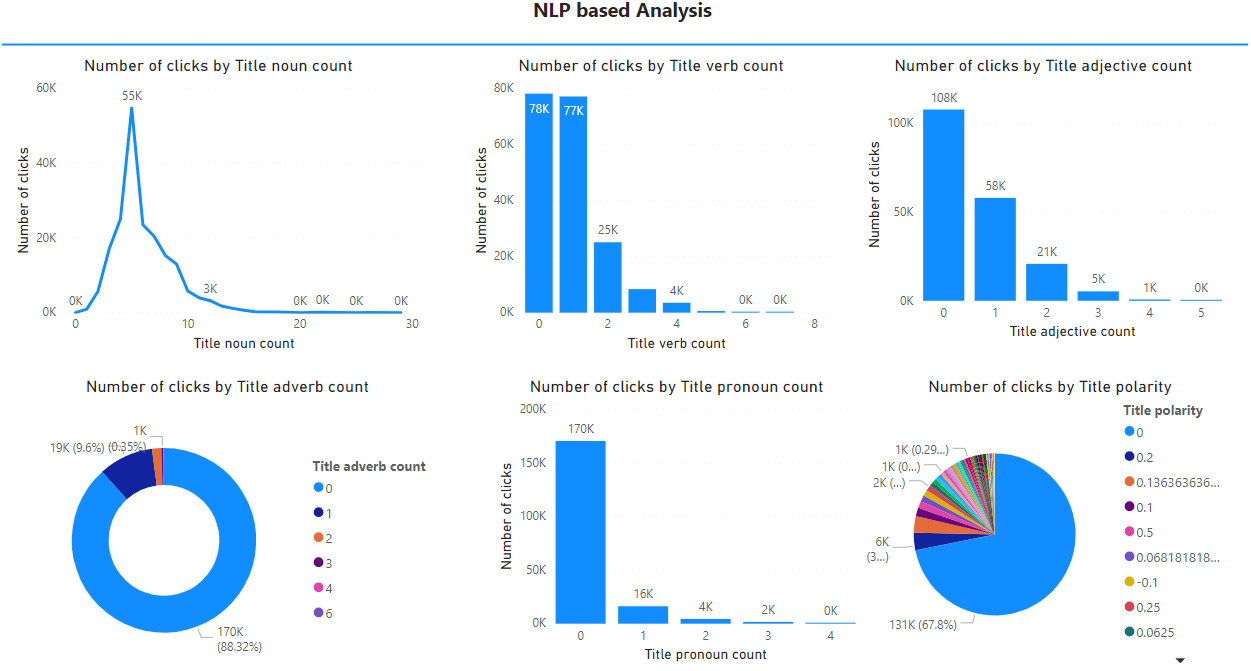

In [11]:
#Displaying Text-Based Analysis
Image(filename='../Exploratory Data Analysis/TextBasedAnalysis.png')

#### NLP Based Features
- Sentiments
- POS tags
- Named Entities

In [30]:
#Enginnering NLP based features
def get_polarity(text):
    try:
        textblob = TextBlob(text)
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

def get_subjectivity(text):
    try:
        textblob = TextBlob(text)
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj
data['polarity'] = data['title'].apply(get_polarity)
data['subjectivity'] = data['title'].apply(get_subjectivity)

In [31]:
#Enginnering NLP based features
def los_word(x,flag):
    cnt=0
    try:
        for tup in x:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

In [32]:
#Enginnering NLP based features
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

In [33]:
#Enginnering NLP based features
data['noun_count'] = data['title'].apply(lambda x: pos_check(x, 'noun'))
data['verb_count'] = data['title'].apply(lambda x: pos_check(x, 'verb'))
data['adj_count'] = data['title'].apply(lambda x: pos_check(x, 'adj'))
data['adv_count'] = data['title'].apply(lambda x: pos_check(x, 'adv'))
data['pron_count'] = data['title'].apply(lambda x: pos_check(x, 'pron'))

In [34]:
#Checking first 4 rows
data.head(4)

,article_id,title,article_publish_date,click_event_date,topic_desc,country_desc,Day,no of clicks,title_length,word_count,...,stopword_count,Ques_Words,End_Puct,polarity,subjectivity,noun_count,verb_count,adj_count,adv_count,pron_count
0,399550,Circumstantial Evidence And Insider Trading,30/08/2018,05/09/2018,Corporate/Commercial Law,Canada,6.0,1,43,5,...,1,0,0,0.0,0.0,3,0,1,0,0
1,399550,Circumstantial Evidence And Insider Trading,30/08/2018,07/09/2018,Corporate/Commercial Law,Canada,8.0,1,43,5,...,1,0,0,0.0,0.0,3,0,1,0,0
2,399550,Circumstantial Evidence And Insider Trading,30/08/2018,12/09/2018,Corporate/Commercial Law,Canada,13.0,5,43,5,...,1,0,0,0.0,0.0,3,0,1,0,0
3,399550,Circumstantial Evidence And Insider Trading,30/08/2018,30/08/2018,Corporate/Commercial Law,Canada,0.0,2,43,5,...,1,0,0,0.0,0.0,3,0,1,0,0


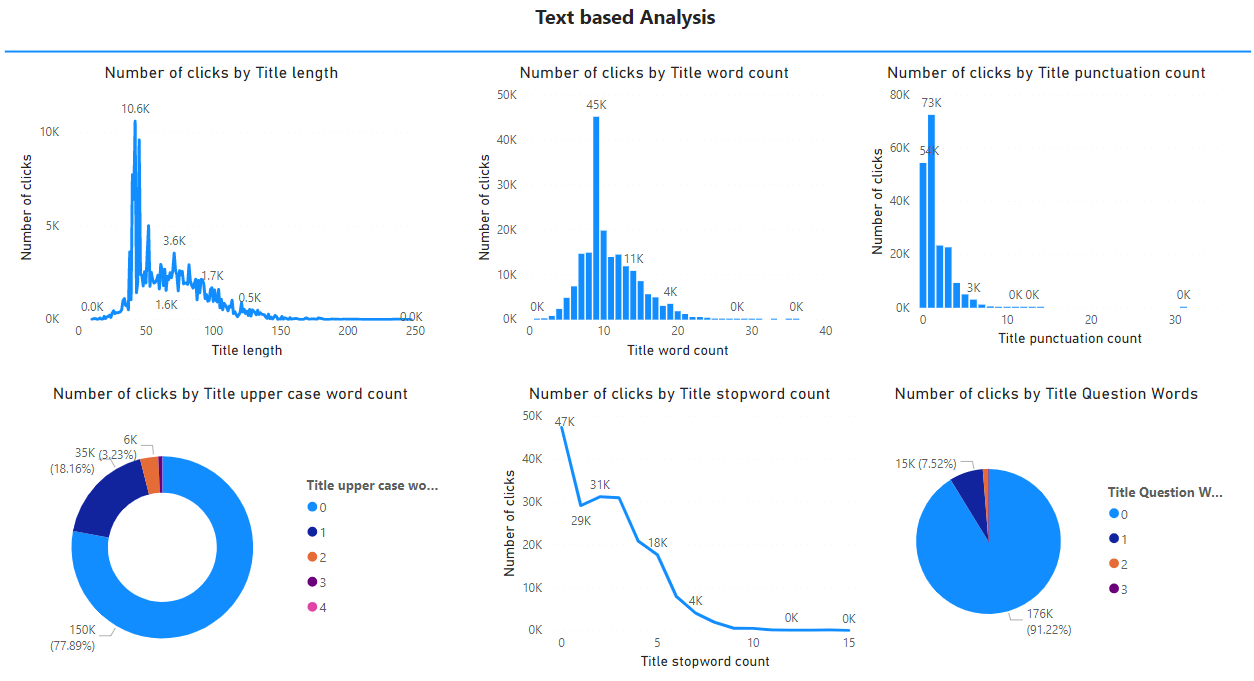

In [10]:
#Displaying NLP-Based Analysis- Parts Of Speech
Image(filename='../Exploratory Data Analysis/NLPBasedAnalysis-POS.png')

In [35]:
#Enginnering NLP based features
def labelcheck(x):
    label=[]
    doc=nlp(x)
    for ent in doc.ents:
        label.append(ent.label_)
    return label

In [36]:
#Enginnering NLP based features
def entitycheck(x):
    #label=[]
    doc=nlp(x)
    return doc.ents

In [37]:
#Enginnering NLP based features
data['NER_Label']=data['title'].apply(labelcheck)
data['Entities']=data['title'].apply(entitycheck)

In [38]:
#Checking a random datapoint
data['NER_Label'][data['title']=='NSW Government Bulletin - 27 June 2018 - Part 1: NSW Charter for Public Participation']

547    [DATE, CARDINAL, ORG]
548    [DATE, CARDINAL, ORG]
549    [DATE, CARDINAL, ORG]
550    [DATE, CARDINAL, ORG]
Name: NER_Label, dtype: object

In [39]:
#Data description
data[['title','NER_Label','Entities']].describe()

,title,NER_Label,Entities
count,37442,37442,37442
unique,4912,277,21079
top,"Inside track: Local Government - In the media,...",[],()
freq,95,16364,16364


In [40]:
#Enginnering NLP based features - generating labels
Labels_iter = (set(p) for p in data['NER_Label'])
Labels = sorted(set.union(*Labels_iter))
Labels

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'TIME',
 'WORK_OF_ART']

In [41]:
#Enginnering NLP based features
data['Entity_count'] = data['NER_Label'].apply(lambda x: len([wrd for wrd in x if wrd in Labels]))

In [42]:
#Checking for a random data point
data[data['title']=='NSW Government Bulletin - 27 June 2018 - Part 1: NSW Charter for Public Participation']

,article_id,title,article_publish_date,click_event_date,topic_desc,country_desc,Day,no of clicks,title_length,word_count,...,polarity,subjectivity,noun_count,verb_count,adj_count,adv_count,pron_count,NER_Label,Entities,Entity_count
547,715236,NSW Government Bulletin - 27 June 2018 - Part ...,02/07/2018,02/07/2018,"Government, Public Sector",Australia,0.0,1,85,15,...,0.0,0.066667,8,0,1,0,0,"[DATE, CARDINAL, ORG]","((June, 2018), (1), (NSW, Charter, for, Public...",3
548,715236,NSW Government Bulletin - 27 June 2018 - Part ...,02/07/2018,03/07/2018,"Government, Public Sector",Australia,1.0,1,85,15,...,0.0,0.066667,8,0,1,0,0,"[DATE, CARDINAL, ORG]","((June, 2018), (1), (NSW, Charter, for, Public...",3
549,715236,NSW Government Bulletin - 27 June 2018 - Part ...,02/07/2018,05/07/2018,"Government, Public Sector",Australia,3.0,1,85,15,...,0.0,0.066667,8,0,1,0,0,"[DATE, CARDINAL, ORG]","((June, 2018), (1), (NSW, Charter, for, Public...",3
550,715236,NSW Government Bulletin - 27 June 2018 - Part ...,02/07/2018,10/07/2018,"Government, Public Sector",Australia,8.0,1,85,15,...,0.0,0.066667,8,0,1,0,0,"[DATE, CARDINAL, ORG]","((June, 2018), (1), (NSW, Charter, for, Public...",3


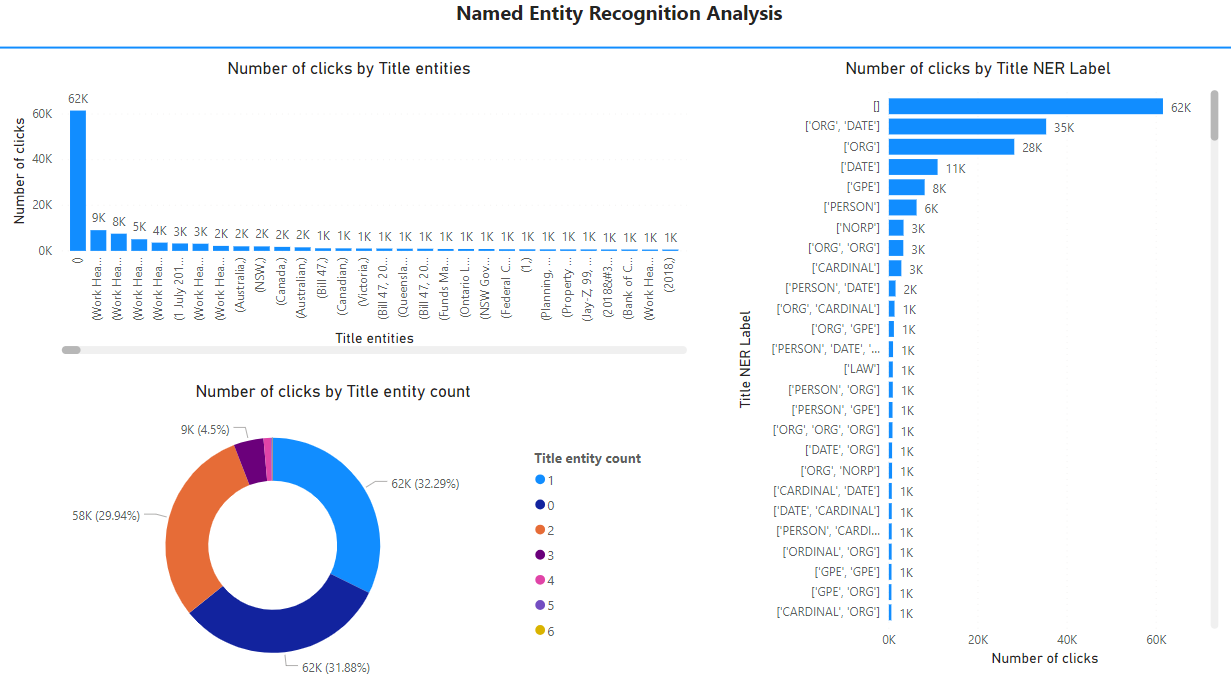

In [13]:
#Displaying NLP-Based Analysis- NER
Image(filename='../Exploratory Data Analysis/NLPBasedAnalysis_NER.png')

### 5. Data Preparation for modelling
 - Encoding Categorical Variables
 - Text Cleaning
 - Text Featurization

In [92]:
#data_mod=data.groupby('title')['no of clicks'].sum().to_frame(name = 'no of clicks').reset_index()
data_mod.head(2)

,article_id,title,title_length,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,Ques_Words,End_Puct,...,Country_Canada,Topic_Employment and HR,Topic_Finance and Banking,"Topic_Food, Drugs, Healthcare, Life Sciences","Topic_Government, Public Sector",Topic_Intellectual Property,"Topic_Litigation, Mediation & Arbitration",Topic_Privacy,Topic_Real Estate and Construction,Topic_Tax
0,399550,circumstanti evid insid trade,43,5,7.166667,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,612432,bud financ activ marijuana industri,60,9,6.000000,1,1,3,0,0,...,1,0,0,0,0,0,0,0,0,0


In [95]:
#Data Creation for modelling

data_mod=data.groupby(['article_id','title','topic_desc','country_desc','title_length','word_count','word_density', 'punctuation_count','upper_case_word_count', 'stopword_count', 'Ques_Words', 'End_Puct','polarity', 'subjectivity', 'noun_count', 'verb_count', 'adj_count','adv_count', 'pron_count', 'Entity_count'])['no of clicks'].sum().to_frame(name = 'no of clicks').reset_index()
print(data_mod.shape)
      
#Generating classses
Ctopic1=pd.qcut(data_mod['no of clicks'][(data_mod['topic_desc']=='Corporate/Commercial Law') ],3,labels=[1,2,3])
Ctopic2=pd.qcut(data_mod['no of clicks'][(data_mod['topic_desc']=='Employment and HR') ], 3,labels=[1,2,3])
Ctopic3=pd.qcut(data_mod['no of clicks'][(data_mod['topic_desc']=='Real Estate and Construction') ], 3,labels=[1,2,3])
Ctopic4=pd.qcut(data_mod['no of clicks'][(data_mod['topic_desc']=='Government, Public Sector') ], 3,labels=[1,2,3])
Ctopic5=pd.qcut(data_mod['no of clicks'][(data_mod['topic_desc']=='Litigation, Mediation & Arbitration')], 3,labels=[1,2,3])
Ctopic6=pd.qcut(data_mod['no of clicks'][(data_mod['topic_desc']=='Food, Drugs, Healthcare, Life Sciences') ], 3,labels=[1,2,3])
Ctopic7=pd.qcut(data_mod['no of clicks'][(data_mod['topic_desc']=='Intellectual Property')], 3,labels=[1,2,3])
Ctopic8=pd.qcut(data_mod['no of clicks'][(data_mod['topic_desc']=='Finance and Banking') ], 3,labels=[1,2,3])
Ctopic9=pd.qcut(data_mod['no of clicks'][(data_mod['topic_desc']=='Privacy') ], 3,labels=[1,2,3])
Ctopic10=pd.qcut(data_mod['no of clicks'][(data_mod['topic_desc']=='Tax') ], 3,labels=[1,2,3])

data_mod['Class']=pd.concat([Ctopic1,Ctopic2,Ctopic3,Ctopic4,Ctopic5,Ctopic6,Ctopic7,Ctopic8,Ctopic9,Ctopic10],axis=0)
data_mod.head(4)

(4992, 21)


,article_id,title,topic_desc,country_desc,title_length,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,...,polarity,subjectivity,noun_count,verb_count,adj_count,adv_count,pron_count,Entity_count,no of clicks,Class
0,399550,Circumstantial Evidence And Insider Trading,Corporate/Commercial Law,Canada,43,5,7.166667,0,0,1,...,0.000000,0.000000,3,0,1,0,0,0,9,1
1,612432,Budding M&A And Financing Activity In The Mari...,Corporate/Commercial Law,Canada,60,9,6.000000,1,1,3,...,0.100000,0.200000,7,0,0,0,0,0,7,1
2,682106,Employee Dismissed For Lying Could Not Use Evi...,Employment and HR,Canada,82,14,5.466667,0,0,5,...,-0.075000,0.125000,7,2,0,1,0,0,8,1
3,682108,The New Construction Act: Summary And Timeline...,Real Estate and Construction,Canada,64,10,5.818182,1,0,3,...,0.099432,0.477273,5,0,2,0,0,1,5,1


In [96]:
#Counting Classes
data_mod['Class'].value_counts()

1    1715
2    1661
3    1616
Name: Class, dtype: int64

#### Text Cleaning

In [97]:
# Text cleaning Pipeline
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def cleantext(text):
    title=[]
    #for i in text:
    title = re.sub('[^a-zA-Z]', ' ', text)
    title = title.lower()
    title = title.split()
    title = [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title = ' '.join(title)
    return title

In [98]:
#Text cleaning
data_mod['title']=data_mod['title'].apply(cleantext)

In [99]:
#Checking for first four rows after cleaning data
data_mod.head(4)

,article_id,title,topic_desc,country_desc,title_length,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,...,polarity,subjectivity,noun_count,verb_count,adj_count,adv_count,pron_count,Entity_count,no of clicks,Class
0,399550,circumstanti evid insid trade,Corporate/Commercial Law,Canada,43,5,7.166667,0,0,1,...,0.000000,0.000000,3,0,1,0,0,0,9,1
1,612432,bud financ activ marijuana industri,Corporate/Commercial Law,Canada,60,9,6.000000,1,1,3,...,0.100000,0.200000,7,0,0,0,0,0,7,1
2,682106,employe dismiss lie could use evid mental ill ...,Employment and HR,Canada,82,14,5.466667,0,0,5,...,-0.075000,0.125000,7,2,0,1,0,0,8,1
3,682108,new construct act summari timelin major chang,Real Estate and Construction,Canada,64,10,5.818182,1,0,3,...,0.099432,0.477273,5,0,2,0,0,1,5,1


#### Encoding Categorical Variables

In [100]:
#Counting values 
data_mod['country_desc'].value_counts()

Australia    2958
Canada       2034
Name: country_desc, dtype: int64

In [101]:
#One-hot Encoding
pd.get_dummies(data_mod['country_desc'],drop_first=True).head(2)

,Canada
0,1
1,1


In [102]:
#Concatinating back to Original Data
data_mod=pd.concat([data_mod,pd.get_dummies(data_mod['country_desc'],drop_first=True,prefix='Country')],axis=1)
data_mod.drop(['country_desc'],axis=1, inplace=True)

In [103]:
#Checking for first for rows
data_mod.head(4)

,article_id,title,topic_desc,title_length,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,Ques_Words,...,subjectivity,noun_count,verb_count,adj_count,adv_count,pron_count,Entity_count,no of clicks,Class,Country_Canada
0,399550,circumstanti evid insid trade,Corporate/Commercial Law,43,5,7.166667,0,0,1,0,...,0.000000,3,0,1,0,0,0,9,1,1
1,612432,bud financ activ marijuana industri,Corporate/Commercial Law,60,9,6.000000,1,1,3,0,...,0.200000,7,0,0,0,0,0,7,1,1
2,682106,employe dismiss lie could use evid mental ill ...,Employment and HR,82,14,5.466667,0,0,5,0,...,0.125000,7,2,0,1,0,0,8,1,1
3,682108,new construct act summari timelin major chang,Real Estate and Construction,64,10,5.818182,1,0,3,0,...,0.477273,5,0,2,0,0,1,5,1,1


In [104]:
#Encoding topic description category
#checking for unique categories
len(data_mod['topic_desc'].unique())

10

In [105]:
#One-hot Encoding
data_mod=pd.concat([data_mod,pd.get_dummies(data_mod['topic_desc'],drop_first=True,prefix='Topic')],axis=1)
data_mod.drop(['topic_desc'],axis=1, inplace=True)
data_mod.head(4)

,article_id,title,title_length,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,Ques_Words,End_Puct,...,Country_Canada,Topic_Employment and HR,Topic_Finance and Banking,"Topic_Food, Drugs, Healthcare, Life Sciences","Topic_Government, Public Sector",Topic_Intellectual Property,"Topic_Litigation, Mediation & Arbitration",Topic_Privacy,Topic_Real Estate and Construction,Topic_Tax
0,399550,circumstanti evid insid trade,43,5,7.166667,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,612432,bud financ activ marijuana industri,60,9,6.000000,1,1,3,0,0,...,1,0,0,0,0,0,0,0,0,0
2,682106,employe dismiss lie could use evid mental ill ...,82,14,5.466667,0,0,5,0,0,...,1,1,0,0,0,0,0,0,0,0
3,682108,new construct act summari timelin major chang,64,10,5.818182,1,0,3,0,0,...,1,0,0,0,0,0,0,0,1,0


#### Text Featurization using Bag of words

In [106]:
#checking first five titles
data_mod['title'][:5]

0                        circumstanti evid insid trade
1                  bud financ activ marijuana industri
2    employe dismiss lie could use evid mental ill ...
3        new construct act summari timelin major chang
4    cheech chong workplac effect marijuana legal e...
Name: title, dtype: object

In [107]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
#cv = CountVectorizer(ngram_range=(1,2))
X_BOW = cv.fit_transform(data_mod['title']).toarray()

In [108]:
#Bag of Words model representation shape
X_BOW.shape

(4992, 49978)

In [109]:
#feature names
cv.get_feature_names()[:10]

['aasb',
 'aasb interpret',
 'aat',
 'aat confirm',
 'aat confirm worker',
 'aat consid',
 'aat consid anoth',
 'abandon',
 'abandon premis',
 'abandon premis case']

In [110]:
#Creating new dataset with bag of Words Representation
count_df = pd.DataFrame(X_BOW, columns=cv.get_feature_names())
data_BOW=pd.concat([data_mod,count_df],axis=1)
data_BOW.drop(columns=['title','article_id'],inplace=True)
data_BOW.head(4)

,title_length,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,Ques_Words,End_Puct,polarity,subjectivity,...,zombi invas,zombi invas stock,zone,zone around,zone around abort,zone law,zone nsw,zone nsw sepp,zone public,zone public use
0,43,5,7.166667,0,0,1,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,60,9,6.000000,1,1,3,0,0,0.100000,0.200000,...,0,0,0,0,0,0,0,0,0,0
2,82,14,5.466667,0,0,5,0,0,-0.075000,0.125000,...,0,0,0,0,0,0,0,0,0,0
3,64,10,5.818182,1,0,3,0,0,0.099432,0.477273,...,0,0,0,0,0,0,0,0,0,0


#### Text Featurization usingTf-Idf

In [111]:
#Creating TfIdf model
#Applying TfIdf vectorization 
tfidf_v=TfidfVectorizer(ngram_range=(1,2))
X_tfidf=tfidf_v.fit_transform(data_mod['title']).toarray()
#X_tfidf=tfidf_v.fit_transform(data_mod['title'].values)

In [112]:
#Getting tfidf features names
features=tfidf_v.get_feature_names()

In [113]:
#Top TfIdf score
def top_tfidf_feats(row, features, top_n=15):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df
top_tfidf_feats(X_tfidf[0,:],features,15)

,feature,tfidf
0,circumstanti evid,0.443776
1,insid trade,0.443776
2,evid insid,0.443776
3,circumstanti,0.443776
4,evid,0.302768
5,trade,0.266402
6,insid,0.222737
7,estop,0.000000
8,estim given,0.000000
9,estim,0.000000


In [114]:
#Shape of TfIdf Model
X_tfidf.shape

(4992, 26778)

In [115]:
#Creating a new dataset with TfIdf represtation
count_df = pd.DataFrame(X_tfidf, columns=tfidf_v.get_feature_names())
data_Tfidf=pd.concat([data_mod,count_df],axis=1)
data_Tfidf.drop(columns=['title','article_id'],inplace=True)
data_Tfidf.head(4)

,title_length,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,Ques_Words,End_Puct,polarity,subjectivity,...,zero toler,zeugma,zeugma statutori,zombi,zombi invas,zone,zone around,zone law,zone nsw,zone public
0,43,5,7.166667,0,0,1,0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60,9,6.000000,1,1,3,0,0,0.100000,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,82,14,5.466667,0,0,5,0,0,-0.075000,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,64,10,5.818182,1,0,3,0,0,0.099432,0.477273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Text Featurization using Word Embeddings

In [116]:
#!pip install tensorflow==2.0.0-alpha0

In [117]:
#Imports
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [118]:
#One hot representation of data
voc_size=5000
onehot_repr=[one_hot(words,voc_size)for words in data_mod['title']] 
onehot_repr

[[1730, 1370, 4752, 3775],
 [374, 1091, 362, 618, 737],
 [2286, 2902, 4774, 2689, 4328, 1370, 3201, 255, 3660],
 [4547, 1069, 4064, 1850, 4607, 717, 3561],
 [3178, 725, 3786, 2293, 618, 3309, 2570],
 [3042, 4657, 1870, 4641, 2495, 2247, 2921, 4367, 4058, 2197, 2921],
 [4298, 3800, 2039, 2557, 3555, 173, 3561, 4328, 2528, 422, 4328, 751],
 [4577, 4439, 3042, 2902, 3764, 2330, 3631, 3862, 899],
 [4577, 4439, 3042, 2902, 3764, 1370, 4058, 418, 1963, 1553],
 [4577, 4439, 3042, 2902, 3764, 2648, 2893, 1327, 30, 3309, 31, 4439, 2099],
 [3042,
  4657,
  3837,
  3733,
  2478,
  72,
  242,
  3127,
  959,
  4328,
  4644,
  1794,
  959,
  1637,
  1723,
  2900,
  3837,
  3733,
  3766,
  4064],
 [4577, 4439, 3042, 4142, 2116, 306, 3886, 3364],
 [4340,
  618,
  4354,
  97,
  3936,
  3386,
  2070,
  2706,
  2902,
  4166,
  741,
  3113,
  4775,
  3391,
  832,
  1069,
  2570,
  1598,
  1660,
  432,
  4100,
  266],
 [2708, 4605, 4980, 1865, 4657, 1865, 3042],
 [2051, 3519, 251, 46, 1325],
 [1069, 4064, 

In [119]:
#Padding
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1370 4752 3775]
 [   0    0    0 ...  362  618  737]
 [   0    0    0 ... 3201  255 3660]
 ...
 [   0    0    0 ... 3492 1139 2648]
 [   0    0    0 ... 2570 2706 3851]
 [   0    0    0 ... 1758 3562 4395]]


In [120]:
#creating model with Embedding layers
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.compile('adam','mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 10)            50000     
Total params: 50,000
Trainable params: 50,000
Non-trainable params: 0
_________________________________________________________________


In [121]:
#One hot representation of first sentence in Text
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1730, 1370, 4752, 3775])

In [122]:
#Embedding representation of first sentence in Text
print(model.predict(embedded_docs)[0])

[[-3.6194004e-02  3.1659756e-02  4.8677180e-02 -6.0571544e-03
  -2.9674888e-02  3.6644820e-02 -2.2249496e-02  1.9661974e-02
  -1.8354166e-02 -8.0457218e-03]
 [-3.6194004e-02  3.1659756e-02  4.8677180e-02 -6.0571544e-03
  -2.9674888e-02  3.6644820e-02 -2.2249496e-02  1.9661974e-02
  -1.8354166e-02 -8.0457218e-03]
 [-3.6194004e-02  3.1659756e-02  4.8677180e-02 -6.0571544e-03
  -2.9674888e-02  3.6644820e-02 -2.2249496e-02  1.9661974e-02
  -1.8354166e-02 -8.0457218e-03]
 [-3.6194004e-02  3.1659756e-02  4.8677180e-02 -6.0571544e-03
  -2.9674888e-02  3.6644820e-02 -2.2249496e-02  1.9661974e-02
  -1.8354166e-02 -8.0457218e-03]
 [-3.6194004e-02  3.1659756e-02  4.8677180e-02 -6.0571544e-03
  -2.9674888e-02  3.6644820e-02 -2.2249496e-02  1.9661974e-02
  -1.8354166e-02 -8.0457218e-03]
 [-3.6194004e-02  3.1659756e-02  4.8677180e-02 -6.0571544e-03
  -2.9674888e-02  3.6644820e-02 -2.2249496e-02  1.9661974e-02
  -1.8354166e-02 -8.0457218e-03]
 [-3.6194004e-02  3.1659756e-02  4.8677180e-02 -6.0571544e

### 6. Modelling
- Data Normalization
- Training and Test datasets
- Model Training using Naive bayes
- Model Training using Support Vector Machine
- Model Training using Random Forest
- Model Training using XGBoost
- Model Training using Stacking Techniques
- Model Training using Artiﬁcial Neural Network

#### Working on Bag Of Words Represented data

#### Data Normalization

In [123]:
#Depedent and Independent Varaibles
X=data_BOW.drop(['no of clicks','Class'],axis=1)
y=data_BOW['Class']

#DataNormalization
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_minmax=min_max.fit_transform(X)

#### Training and Test Datasets

In [124]:
#Training and Testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.33, random_state=42)
X_train.shape,y_train.shape

((3344, 50004), (3344,))

#### Model Training using Naive bayes


In [125]:
#Modelling with Naive bayes using BOW Training data
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()

model_NB.fit(X_train,y_train)
y_pred=model_NB.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.4484223300970874
0.4481361034269393
0.45049951068271477
0.44789140023797064
              precision    recall  f1-score   support

           1       0.46      0.51      0.48       554
           2       0.38      0.39      0.38       539
           3       0.51      0.45      0.48       555

    accuracy                           0.45      1648
   macro avg       0.45      0.45      0.45      1648
weighted avg       0.45      0.45      0.45      1648

[[280 184  90]
 [181 210 148]
 [148 158 249]]


In [126]:
#Modelling with Naive bayes using BOW Training data and Feature Importance
from sklearn.feature_selection import SelectKBest, chi2
def reduce_dimensions(train_dtm, test_dtm, k=15000):
    """Reduce dimensionality"""
    ch2 = SelectKBest(chi2, k)
    ch2.fit(train_dtm, y_train)
    train_dtm = ch2.transform(train_dtm)
    test_dtm = ch2.transform(test_dtm)
    return train_dtm, test_dtm
X_train_dim, X_test_dim = reduce_dimensions(X_train, X_test, k=20000)
X_train_dim.shape,y_train.shape


from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()

model_NB.fit(X_train_dim,y_train)
y_pred=model_NB.predict(X_test_dim)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.4344660194174757
0.4119887422583444
0.4469223171643031
0.4324194009083127
              precision    recall  f1-score   support

           1       0.41      0.71      0.52       554
           2       0.35      0.20      0.26       539
           3       0.58      0.38      0.46       555

    accuracy                           0.43      1648
   macro avg       0.45      0.43      0.41      1648
weighted avg       0.45      0.43      0.41      1648

[[395 105  54]
 [333 110  96]
 [245  99 211]]


#### Model Training using Support Vector Machine

In [127]:
#Modelling with SVM using BOW Training data
from sklearn.svm import SVC
model_SVC = SVC()

model_SVC.fit(X_train_dim,y_train)
y_pred=model_SVC.predict(X_test_dim)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.3907766990291262
0.31074852093314065
0.4492385846911709
0.3882256951364738
              precision    recall  f1-score   support

           1       0.38      0.91      0.53       554
           2       0.29      0.09      0.14       539
           3       0.68      0.16      0.26       555

    accuracy                           0.39      1648
   macro avg       0.45      0.39      0.31      1648
weighted avg       0.45      0.39      0.31      1648

[[505  44   5]
 [453  50  36]
 [386  80  89]]


#### Model Training using Random Forest


In [128]:
#Modelling with Random Forest using BOW Training data
from sklearn.ensemble import RandomForestClassifier
RandomForestClas = RandomForestClassifier()

RandomForestClas.fit(X_train_dim,y_train)
y_pred=RandomForestClas.predict(X_test_dim)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.39987864077669905
0.301247211983288
0.4795927750553181
0.3968036843230241
              precision    recall  f1-score   support

           1       0.37      0.97      0.54       554
           2       0.35      0.04      0.08       539
           3       0.72      0.18      0.29       555

    accuracy                           0.40      1648
   macro avg       0.48      0.40      0.30      1648
weighted avg       0.48      0.40      0.30      1648

[[535  13   6]
 [482  24  33]
 [423  32 100]]


#### Model Training using XGBoost

In [129]:
#Modelling with XGBoost using BOW Training data
import xgboost
Classifier=xgboost.XGBClassifier()
Classifier.fit(X_train,y_train)
y_pred=Classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.45145631067961167
0.44919304065431004
0.456895521095036
0.4506849153058539
              precision    recall  f1-score   support

           1       0.47      0.57      0.51       554
           2       0.36      0.36      0.36       539
           3       0.54      0.42      0.47       555

    accuracy                           0.45      1648
   macro avg       0.46      0.45      0.45      1648
weighted avg       0.46      0.45      0.45      1648

[[317 170  67]
 [216 196 127]
 [146 178 231]]


#### Model Training using Stacking Techniques

In [130]:
#Modelling with Stacking Techniques using BOW Training data
from mlxtend.classifier import StackingClassifier
sclf = StackingClassifier(classifiers=[model_SVC, model_NB], 
                          meta_classifier=RandomForestClas)
sclf.fit(X_train,y_train)

y_pred=sclf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.4344660194174757
0.4322179306733585
0.4498032327412435
0.4348977015299862
              precision    recall  f1-score   support

           1       0.46      0.51      0.48       554
           2       0.37      0.47      0.42       539
           3       0.52      0.32      0.40       555

    accuracy                           0.43      1648
   macro avg       0.45      0.43      0.43      1648
weighted avg       0.45      0.43      0.43      1648

[[280 210  64]
 [181 256 102]
 [148 227 180]]


#### Working on TfIdf Represented data

#### Data Nomalization

In [132]:
#Dependant and independent variables
X=data_Tfidf.drop(['no of clicks','Class'],axis=1)
y=data_Tfidf['Class']

#Data Normalization
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_minmax=min_max.fit_transform(X)

#### Train and Test datsets

In [133]:
#Train and Test datsets
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.33, random_state=42)
X_train.shape,y_train.shape

((3344, 26804), (3344,))

#### Model Training using Naive bayes

In [134]:
#Modelling with Naive Bayes using TfIdf Training data
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()

model_NB.fit(X_train,y_train)
y_pred=model_NB.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.4575242718446602
0.45659255475991767
0.45685571719727314
0.45684475524599294
              precision    recall  f1-score   support

           1       0.47      0.50      0.49       554
           2       0.39      0.38      0.39       539
           3       0.51      0.48      0.50       555

    accuracy                           0.46      1648
   macro avg       0.46      0.46      0.46      1648
weighted avg       0.46      0.46      0.46      1648

[[278 175 101]
 [171 207 161]
 [141 145 269]]


In [135]:
#Modelling with Naive bayes using TfIdf Training data and Feature Importance
from sklearn.feature_selection import SelectKBest, chi2
def reduce_dimensions(train_dtm, test_dtm, k=15000):
    """Reduce dimensionality"""
    ch2 = SelectKBest(chi2, k)
    ch2.fit(train_dtm, y_train)
    train_dtm = ch2.transform(train_dtm)
    test_dtm = ch2.transform(test_dtm)
    return train_dtm, test_dtm
X_train_dim, X_test_dim = reduce_dimensions(X_train, X_test, k=20000)
X_train_dim.shape,y_train.shape


from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()

model_NB.fit(X_train_dim,y_train)
y_pred=model_NB.predict(X_test_dim)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.4587378640776699
0.45852942553955356
0.45988387019282345
0.45822424233976583
              precision    recall  f1-score   support

           1       0.47      0.50      0.49       554
           2       0.40      0.40      0.40       539
           3       0.51      0.47      0.49       555

    accuracy                           0.46      1648
   macro avg       0.46      0.46      0.46      1648
weighted avg       0.46      0.46      0.46      1648

[[278 178  98]
 [174 217 148]
 [140 154 261]]


#### Model Training using Support Vector Machine

In [136]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001],'degree':range(1,6) }
grid= GridSearchCV(SVC(),param_grid, verbose=3)
#grid.fit(train_x,train_y)
#grid.best_params_

In [137]:
#Modelling with SVC using TfIdf Training data
from sklearn.svm import SVC
#model_SVC = SVC(C=10,degree=1, gamma=1)
model_SVC = SVC()


model_SVC.fit(X_train,y_train)
y_pred=model_SVC.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.44235436893203883
0.43887562894146576
0.47384242270119054
0.44209572089922783
              precision    recall  f1-score   support

           1       0.44      0.59      0.50       554
           2       0.36      0.41      0.38       539
           3       0.62      0.33      0.43       555

    accuracy                           0.44      1648
   macro avg       0.47      0.44      0.44      1648
weighted avg       0.47      0.44      0.44      1648

[[326 192  36]
 [245 219  75]
 [176 195 184]]


#### Model Training using Random Forest

In [138]:
#Modelling with Random Forest using TfIdf Training data
from sklearn.ensemble import RandomForestClassifier
RandomForestClas = RandomForestClassifier()

RandomForestClas.fit(X_train,y_train)
y_pred=RandomForestClas.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.4532766990291262
0.44394922318113755
0.4726408367839719
0.4525922404725912
              precision    recall  f1-score   support

           1       0.46      0.66      0.54       554
           2       0.37      0.37      0.37       539
           3       0.59      0.33      0.42       555

    accuracy                           0.45      1648
   macro avg       0.47      0.45      0.44      1648
weighted avg       0.47      0.45      0.44      1648

[[365 151  38]
 [252 199  88]
 [185 187 183]]


In [140]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
grid_search = GridSearchCV(estimator=RandomForestClas,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
#grid_search.fit(x_train,y_train)
#grid_search.best_params_

In [ ]:
#Modelling with Random Forest using TfIdf Training data
from sklearn.ensemble import RandomForestClassifier

RandomForestClas = RandomForestClassifier(criterion= 'entropy',
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 115,random_state=6)

#RandomForestClas = RandomForestClassifier()
RandomForestClas.fit(X_train,y_train)
y_pred=RandomForestClas.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#### Model Training using XGBoost

In [144]:
from xgboost import XGBClassifier 
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)
#grid.fit(train_x,train_y)
#grid.best_params_

In [145]:
#Modelling with XGBoost using TfIdf Training data
import xgboost
Classifier=xgboost.XGBClassifier()
#Classifier=xgboost.XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
Classifier.fit(X_train,y_train)
y_pred=Classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.4544902912621359
0.45151098833356024
0.45907570212821147
0.45390836607958834
              precision    recall  f1-score   support

           1       0.48      0.58      0.53       554
           2       0.37      0.39      0.38       539
           3       0.53      0.39      0.45       555

    accuracy                           0.45      1648
   macro avg       0.46      0.45      0.45      1648
weighted avg       0.46      0.45      0.45      1648

[[323 162  69]
 [204 208 127]
 [147 190 218]]


#### Model Training using Stacking Techniques


In [146]:
#Modelling with Stacking Techniques using TfIdf Training data
from mlxtend.classifier import StackingClassifier
sclf = StackingClassifier(classifiers=[model_SVC, model_NB], 
                          meta_classifier=RandomForestClas)
sclf.fit(X_train,y_train)

y_pred=sclf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.44902912621359226
0.4490407261340413
0.4573075057875779
0.4492499572437685
              precision    recall  f1-score   support

           1       0.47      0.49      0.48       554
           2       0.39      0.47      0.43       539
           3       0.51      0.39      0.44       555

    accuracy                           0.45      1648
   macro avg       0.46      0.45      0.45      1648
weighted avg       0.46      0.45      0.45      1648

[[272 194  88]
 [170 253 116]
 [138 202 215]]


#### Model Training using Artiﬁcial Neural Network

In [241]:
#Modelling with ANN using TfIdf Training data and Word Embeddings
data_mod['Class']=pd.qcut(data_mod['no of clicks'], 2,labels=[1,2])
voc_size=5000
onehot_repr=[one_hot(words,voc_size)for words in data_mod['title']] 

sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs.shape)

(4992, 40)


In [242]:
y=data_mod['Class']
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3344, 40), (1648, 40), (3344,), (1648,))

In [245]:
# Importing the Keras libraries and packages
#Imports
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dense(1,activation='sigmoid'))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 40, 40)            200000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 200)               112800    
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 201       
_________________________________________________________________
dropout_12 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 2         
Total params: 313,003
Trainable params: 313,003
Non-trainable params: 0
_________________________________________________________________
None


In [246]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Train on 3344 samples, validate on 1648 samples
Epoch 1/10
3344/3344 [==============================] - 4s 1ms/sample - loss: 0.2981 - accuracy: 0.5233 - val_loss: 0.2013 - val_accuracy: 0.5121
Epoch 2/10
3344/3344 [==============================] - 4s 1ms/sample - loss: 0.1789 - accuracy: 0.5260 - val_loss: 0.1117 - val_accuracy: 0.5121
Epoch 3/10
3344/3344 [==============================] - 5s 2ms/sample - loss: 0.0970 - accuracy: 0.5260 - val_loss: 0.0273 - val_accuracy: 0.5121
Epoch 4/10
3344/3344 [==============================] - 5s 2ms/sample - loss: 0.0186 - accuracy: 0.5260 - val_loss: -0.0539 - val_accuracy: 0.5121
Epoch 5/10
3344/3344 [==============================] - 5s 2ms/sample - loss: -0.0559 - accuracy: 0.5260 - val_loss: -0.1317 - val_accuracy: 0.5121
Epoch 6/10
3344/3344 [==============================] - 5s 2ms/sample - loss: -0.1288 - accuracy: 0.5260 - val_loss: -0.2065 - val_accuracy: 0.5121
Epoch 7/10
3344/3344 [==============================] - 5s 2ms/sample -

In [247]:
y_pred=model1.predict_classes(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5121359223300971
0.3386837881219904
0.25606796116504854
0.5
              precision    recall  f1-score   support

           1       0.51      1.00      0.68       844
           2       0.00      0.00      0.00       804

    accuracy                           0.51      1648
   macro avg       0.26      0.50      0.34      1648
weighted avg       0.26      0.51      0.35      1648

[[844   0]
 [804   0]]


### Discussions


- It is essential to make clear that all ﬁndings we presented in this paper relate to 5000 Mondaq Articles with a published duration of 2 weeks in the countries of Australia and Canada and ﬁndings may not be correct for other countries and other businesses. 
- Moreover, we can also further improve the accuracy of the models by incorporating advanced Natural language processing techniques such as Attentive based models, Recurrent Neural Networks, RNN with Long short-term memory, and finally  State of art Bert vectorization techniques. These are exactly our future work.

### Conclusion

This Notebook aims to explore the assumption that the formulation of article titles contributes significantly to the level of user interaction.
- Our text based analysis shows that article titles with moderate length, the word count of nine, at least one punctuation, lower casing, minimum stop words, and descriptive or declarative title can cause a high contribution to user engagement.
- Similarly, NLP based analysis shows that article titles with moderate nouns, avoiding adjectives, adverbs and pronouns, minimum usage of verbs and Entities, and ﬁnally posing neutral sentiment titles can engage users. 
- On the other hand, Our model evaluation results highlight that the best method turned out to be the Naïve Bayes modeling using the TfIDF vectorization technique achieving an accuracy of 45.75 percentage.
- This research could aid News syndication platforms in understanding how article titles affect user engagement. Exploratory data analysis contribute to making better decisions during article title creation.